In [31]:
# Name: Michael Scoli
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt

In [32]:
# Load the data
diabeticData = pd.read_csv("FinalData.csv")
diabeticData.head()

,race_0,race_1,race_2,gender_0,gender_1,age,admission_type_id_0,admission_type_id_1,admission_type_id_2,admission_type_id_3,...,glipizide-metformin_1,glimepiride-pioglitazone_0,glimepiride-pioglitazone_1,metformin-pioglitazone_0,metformin-pioglitazone_1,change_0,change_1,diabetesMed_0,diabetesMed_1,readmitted
0,0.0,0.0,1.0,0.0,1.0,0.111111,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
1,0.0,1.0,0.0,0.0,1.0,0.222222,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.0,0.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,0.0,0.0,1.0,1.0,0.0,0.444444,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,0.0,0.0,1.0,1.0,0.0,0.555556,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [33]:
# split dataset
X = diabeticData.iloc[:, :-1]
y = diabeticData.iloc[:, -1]
X_train, X_test, y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [35]:
model.score(X_test, Y_test)

0.47790318194180037

In [36]:
model.predict(X_test[:-1])

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
# model.predict_proba(X_test[:10])

In [38]:
# Make prediction using the model
Y_pred = model.predict(X_test)

0    15576
1    13840
Name: readmitted, dtype: int64


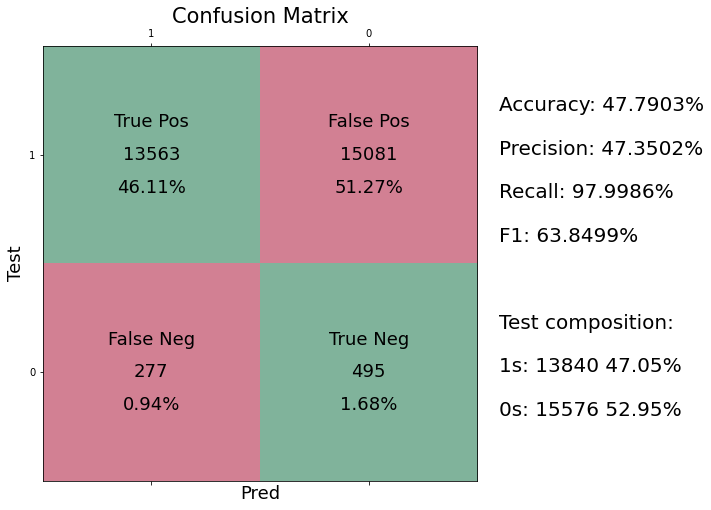

In [40]:
#Getting confusion matrix
tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()
tot=tn+fp+fn+tp
#Structure of plot
cm=np.array(((1,0),(0,1)))
fig,ax=plt.subplots(figsize=(8,8))
plt.xlabel('Pred', fontsize=18)
plt.ylabel('Test', fontsize=18)
plt.title('Confusion Matrix', fontsize=21)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['1','0'])
ax.set_yticklabels(['1','0'])
ax.matshow(cm,cmap='RdYlGn',alpha=0.5)
#Numeric vals
ax.text(0,0,s=tp,va='center',ha='center',fontsize=18)
ax.text(1,0,s=fp,va='center',ha='center',fontsize=18)
ax.text(0,1,s=fn,va='center',ha='center',fontsize=18)
ax.text(1,1,s=tn,va='center',ha='center',fontsize=18)
#Labels
ax.text(0,-.15,s="True Pos",va='center',ha='center',fontsize=18)
ax.text(1,-.15,s="False Pos",va='center',ha='center',fontsize=18)
ax.text(0,.85,s="False Neg",va='center',ha='center',fontsize=18)
ax.text(1,.85,s="True Neg",va='center',ha='center',fontsize=18)
#Percentages
ax.text(0,.15,s=str(round((tp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,.15,s=str(round((fp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(0,1.15,s=str(round((fn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,1.15,s=str(round((tn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
#Result overview
acc=(tp+tn)/(tp+tn+fp+fn)
pre=(tp)/(tp+fp)
rec=(tp)/(tp+fn)
ax.text(1.6,-.2,"Accuracy: "+str(round((acc)*100 ,4))+'%',fontsize=20)
ax.text(1.6,0,"Precision: "+str(round((pre)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.2,"Recall: "+str(round((rec)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.4,"F1: "+str(round(( 2*((pre*rec)/(pre+rec)) )*100 ,4))+'%',fontsize=20)
c=Y_test.value_counts()
print(c)
t1=c[1]
t0=c[0]
ax.text(1.6,.8,"Test composition:",fontsize=20)
ax.text(1.6,1,"1s: "+str(t1)+" "+str(round((t1/(t1+t0))*100 ,2))+'%',fontsize=20)
ax.text(1.6,1.2,"0s: "+str(t0)+" "+str(round((t0/(t1+t0))*100 ,2))+'%',fontsize=20)
del acc,ax,cm,fig,fn,fp,pre,rec,tn,tot,tp
plt.show()